## Welcome!

Welcome to the new XRT github page! You can look through the code that created some of the XPOW movies you love. You can also 'clone' this notebook and try running it on your own. 

Have fun!

In [1]:
%matplotlib inline
#import everything you need to run the code (you may need to download these packages separately)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the latest version of the XRT flare catalog from the website
df = pd.read_csv('http://xrt.cfa.harvard.edu/flare_catalog/xrt_flarecat.csv')
new_index = pd.to_datetime(df['start'])
df = df.set_index(new_index)

df.index

DatetimeIndex(['2006-10-20 19:17:00', '2006-10-21 15:13:00',
               '2006-10-21 16:18:00', '2006-10-21 18:03:00',
               '2006-10-21 18:24:00', '2006-10-21 19:56:00',
               '2006-10-22 02:30:00', '2006-10-22 03:08:00',
               '2006-10-22 04:19:00', '2006-10-22 06:06:00',
               ...
               '2016-02-27 04:51:00', '2016-02-27 05:16:00',
               '2016-02-27 05:44:00', '2016-02-27 11:30:00',
               '2016-02-27 15:11:00', '2016-02-28 06:30:00',
               '2016-02-28 11:31:00', '2016-02-28 17:17:00',
               '2016-02-29 04:19:00', '2016-02-29 16:43:00'],
              dtype='datetime64[ns]', name=u'start', length=14218, freq=None)

In [5]:
#Print the 5 most recent entries
df.tail()

id  \
start                         
2016-02-28 06:30:00  142150   
2016-02-28 11:31:00  142160   
2016-02-28 17:17:00  142170   
2016-02-29 04:19:00  142180   
2016-02-29 16:43:00  142190   

                                                              flarecat  \
start                                                                    
2016-02-28 06:30:00  http://xrt.cfa.harvard.edu/flare_catalog/2016_...   
2016-02-28 11:31:00  http://xrt.cfa.harvard.edu/flare_catalog/2016_...   
2016-02-28 17:17:00  http://xrt.cfa.harvard.edu/flare_catalog/2016_...   
2016-02-29 04:19:00  http://xrt.cfa.harvard.edu/flare_catalog/2016_...   
2016-02-29 16:43:00  http://xrt.cfa.harvard.edu/flare_catalog/2016_...   

                                start               end              peak  \
start                                                                       
2016-02-28 06:30:00  2016/02/28 06:30  2016/02/28 07:11  2016/02/28 06:56   
2016-02-28 11:31:00  2016/02/28 11:31  2016/02/28 11:52  2016/02/28 11:38   
2016-02-28 17:17:00  2016/02/28 17:17  2016/02/28 17:32  2016/02/28 17:21   
2016-02-29 04:19:00  2016/02/29 04:19  2016/02/29 04:41  2016/02/29 04:30   
2016-02-29 16:43:00  2016/02/29 16:43  2016/02/29 17:27  2016/02/29 17:06   

                       loc1 class     X   Y SOT  \
start                                             
2016-02-28 06:30:00  S08E10  B4.5  -172 -23   0   
2016-02-28 11:31:00  S07E02  B4.1   -36  -1   0   
2016-02-28 17:17:00  S06W01  B2.6    30   6   0   
2016-02-29 04:19:00  S08W03  B6.9    50 -33   0   
2016-02-29 16:43:00  N04E89  B5.2 -1013  84   0   

                                           ...                          EIS  \
start                                      ...                                
2016-02-28 06:30:00                        ...                            0   
2016-02-28 11:31:00                        ...                            0   
2016-02-28 17:17:00                        ...                            0   
2016-02-29 04:19:00                        ...                            1   
2016-02-29 16:43:00                        ...                            0   

                    RHESSI NORH combos movies response  pre_flare    obs_note  \
start                                                                           
2016-02-28 06:30:00     no         NaN      -        0          -  no:bakeout   
2016-02-28 11:31:00     no         NaN      -        0          -  no:bakeout   
2016-02-28 17:17:00     no         NaN      -        0          -  no:bakeout   
2016-02-29 04:19:00     no         NaN      -        0          -  no:bakeout   
2016-02-29 16:43:00     no         NaN      -        0          -  no:bakeout   

                    region                                                HEK  
start                                                                          
2016-02-28 06:30:00    NaN  http://www.lmsal.com/hek/her?cmd=view-voevent&...  
2016-02-28 11:31:00    NaN  http://www.lmsal.com/hek/her?cmd=view-voevent&...  
2016-02-28 17:17:00  12506  http://www.lmsal.com/hek/her?cmd=view-voevent&...  
2016-02-29 04:19:00  12506  http://www.lmsal.com/hek/her?cmd=view-voevent&...  
2016-02-29 16:43:00  12510  http://www.lmsal.com/hek/her?cmd=view-voevent&...  

[5 rows x 21 columns]

In [6]:
#Group the dataframe by month (so we can count the number of flares for each month)
df2 = df.groupby(pd.TimeGrouper(freq='M'))

In [8]:
#pull out the number of flares of each size by month
month = []
dates = []
flares = []
s_list = []
A_flare = []
B_flare = []
C_flare = []
M_flare = []
X_flare = []
for name, group in df2:
    A_flare.append(len([col for col in list(group['class']) if col.startswith('A')]))
    B_flare.append(len([col for col in list(group['class']) if col.startswith('B')]))
    C_flare.append(len([col for col in list(group['class']) if col.startswith('C')]))
    M_flare.append(len([col for col in list(group['class']) if col.startswith('M')]))
    X_flare.append(len([col for col in list(group['class']) if col.startswith('X')]))
    
    month.append(name.strftime('%B %Y'))
    dates.append(name)
    flares.append(len(group))


In [9]:
#prints an array containing the count of M-flares for each month since the launch of XRT
print M_flare

[0, 0, 5, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 7, 0, 0, 1, 2, 0, 1, 0, 1, 3, 0, 1, 13, 19, 3, 1, 2, 2, 7, 30, 9, 13, 8, 6, 1, 19, 2, 12, 11, 45, 10, 4, 6, 14, 0, 5, 1, 3, 4, 14, 4, 1, 3, 0, 33, 19, 12, 26, 39, 22, 3, 5, 16, 5, 7, 11, 41, 16, 17, 13, 2, 28, 11, 5, 12, 3, 11, 19, 10, 4, 6, 1, 4]


113


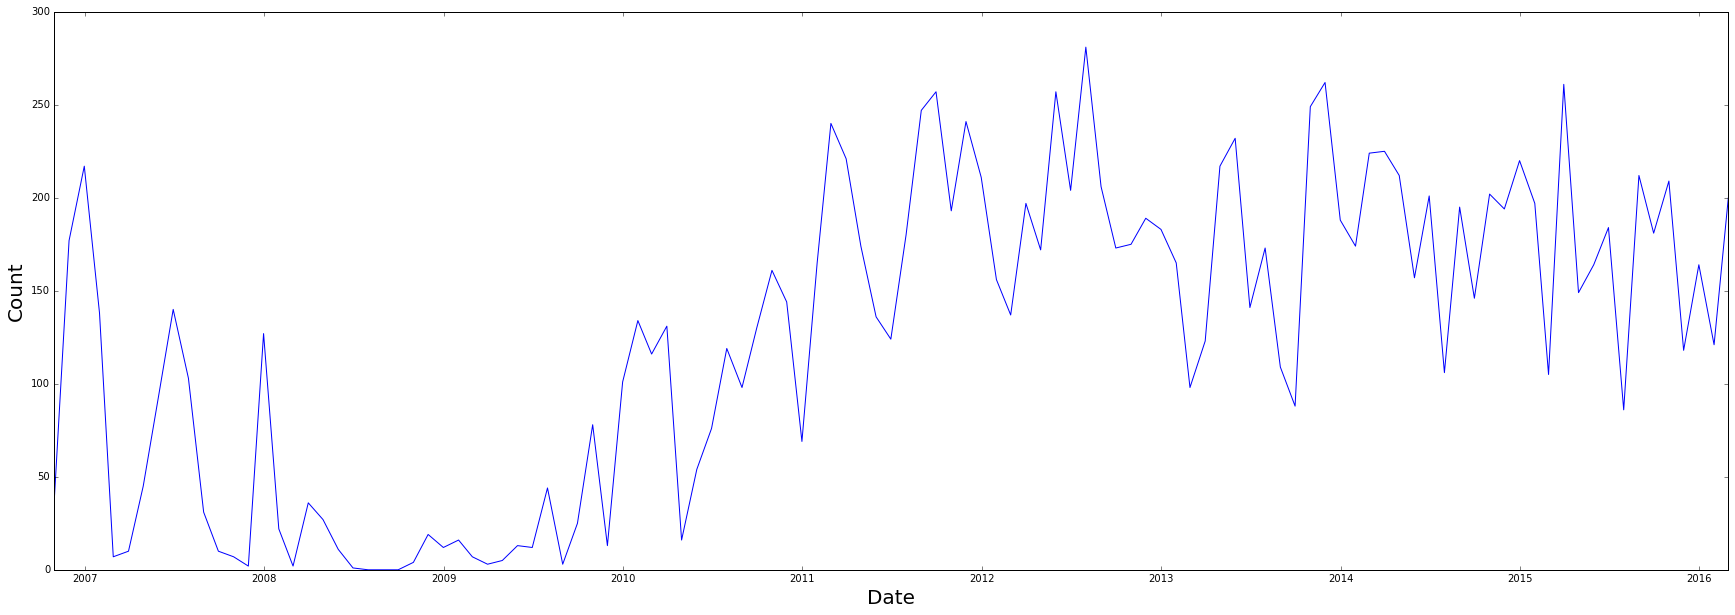

In [15]:
print len(month) #Total number of months in the XRT flare catalog
month2 = range(0,len(month))
plt.figure(figsize=(30,10))
plt.plot(dates, flares)
plt.xlabel('Date', size=20)
plt.ylabel('Count', size=20)

plt.show()

In [10]:
#create a function that will plot the number of flares by size for each month
#You can try to make a new function that creates a single plot that isn't dependent on a start or end time. 
def make_stackplot(start_ind, end_ind):
    my_dpi=100
    plt.figure(figsize=(10.24, 3.84), dpi=my_dpi) #set the default size to 1024x384
    plt.stackplot(dates, [B_flare, C_flare, M_flare, X_flare], colors=['DarkRed','OrangeRed','Goldenrod','Yellow'])
    plt.legend(['B-flare: %d' %B_flare[i],'C-flare: %d' %C_flare[i],'M-flare: %d'% M_flare[i],'X-flare: %d'%X_flare[i]], loc='upper left')
    plt.axvspan(month[start_ind], month[end_ind], alpha=0.5, color='DarkCyan')
    plt.xlabel('Time')
    plt.ylabel('Total recorded flares in a month, by size')
    plt.text(dates[10],200, 'Xflares: %d' %X_flare[i])
    j = str(start_ind)
    #you can uncomment the following line if you want to save out the image.
    #plt.savefig('XPOW_testfig%s.png' % j.zfill(3), dpi=my_dpi)


In [11]:
print month

['October 2006', 'November 2006', 'December 2006', 'January 2007', 'February 2007', 'March 2007', 'April 2007', 'May 2007', 'June 2007', 'July 2007', 'August 2007', 'September 2007', 'October 2007', 'November 2007', 'December 2007', 'January 2008', 'February 2008', 'March 2008', 'April 2008', 'May 2008', 'June 2008', 'July 2008', 'August 2008', 'September 2008', 'October 2008', 'November 2008', 'December 2008', 'January 2009', 'February 2009', 'March 2009', 'April 2009', 'May 2009', 'June 2009', 'July 2009', 'August 2009', 'September 2009', 'October 2009', 'November 2009', 'December 2009', 'January 2010', 'February 2010', 'March 2010', 'April 2010', 'May 2010', 'June 2010', 'July 2010', 'August 2010', 'September 2010', 'October 2010', 'November 2010', 'December 2010', 'January 2011', 'February 2011', 'March 2011', 'April 2011', 'May 2011', 'June 2011', 'July 2011', 'August 2011', 'September 2011', 'October 2011', 'November 2011', 'December 2011', 'January 2012', 'February 2012', 'March

113


//anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


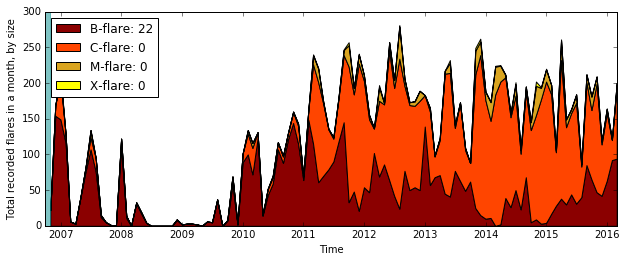

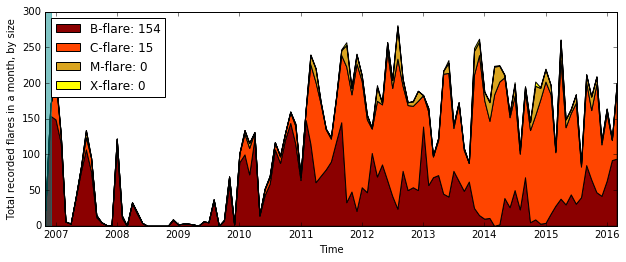

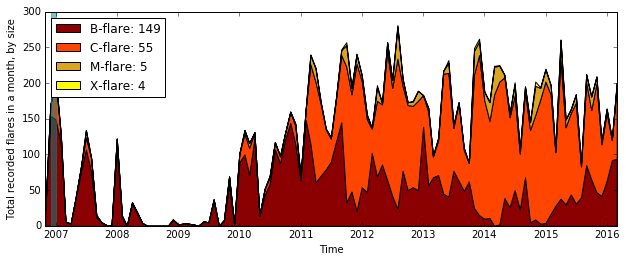

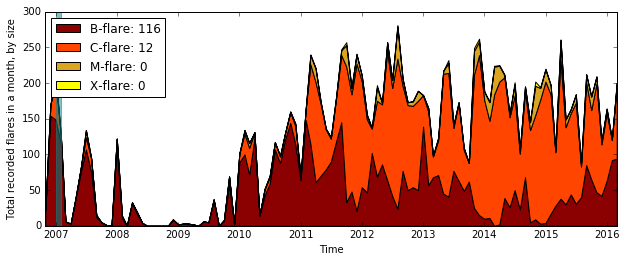

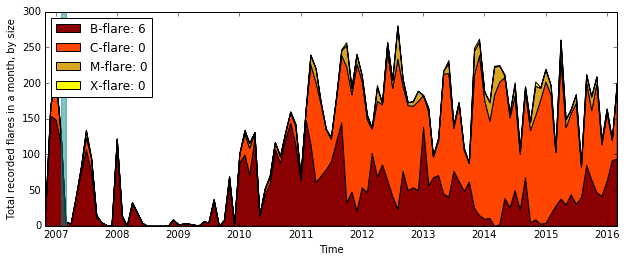

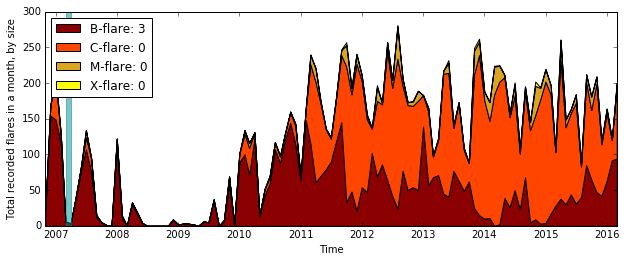

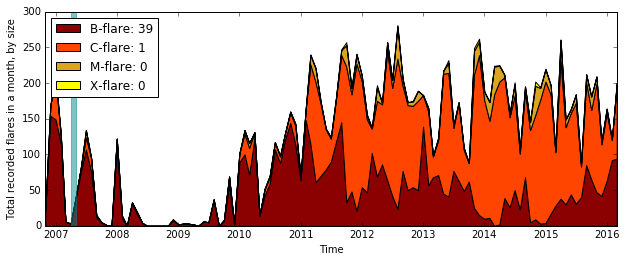

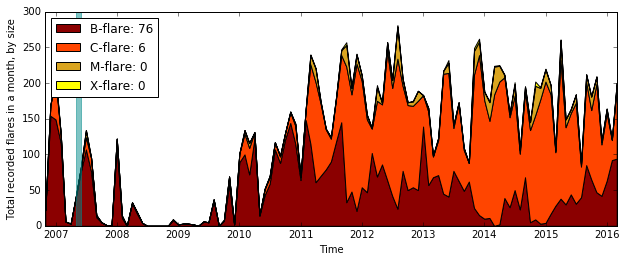

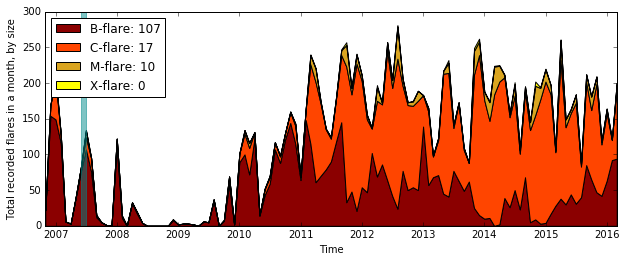

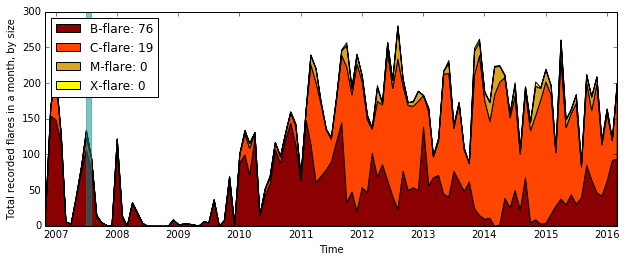

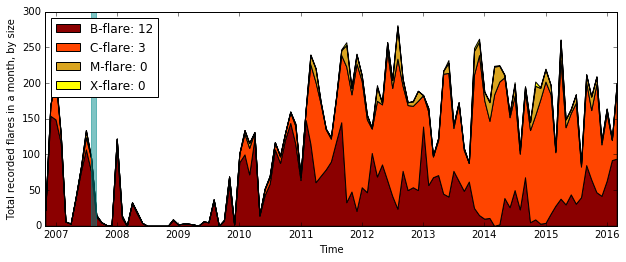

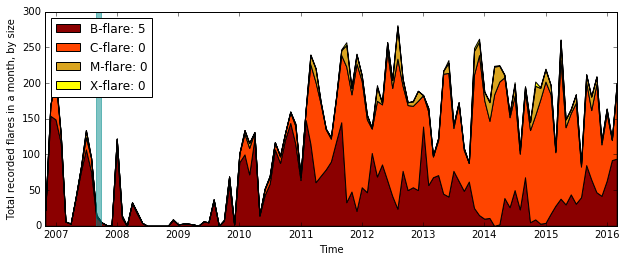

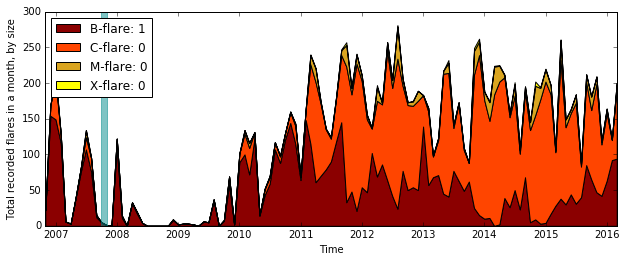

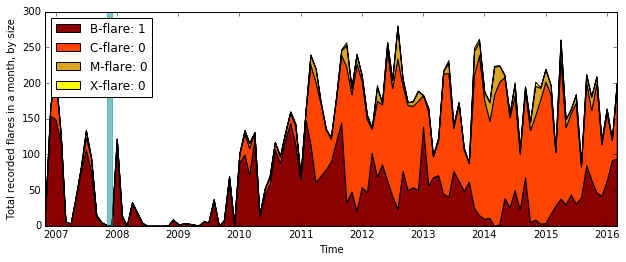

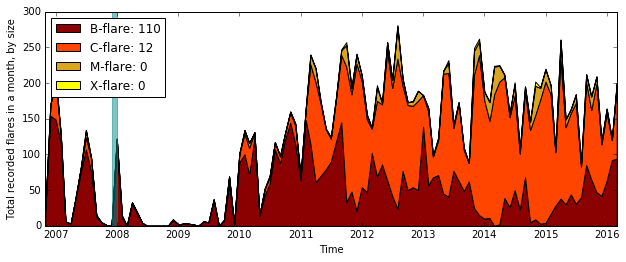

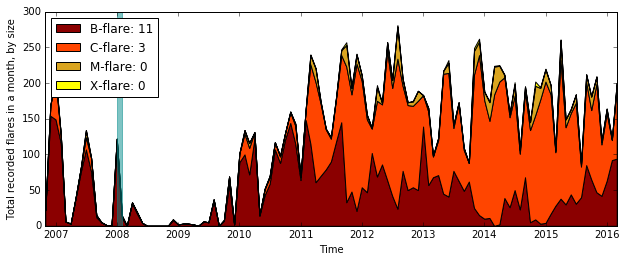

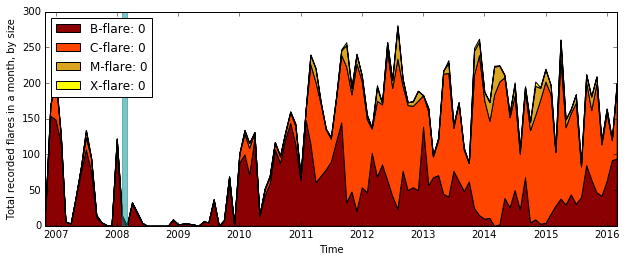

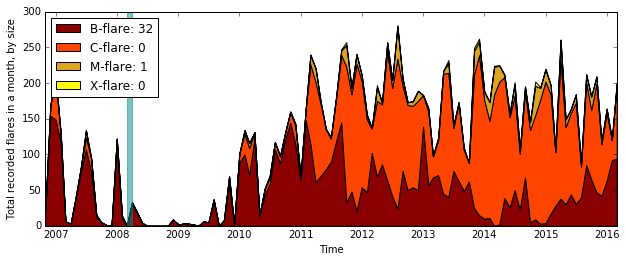

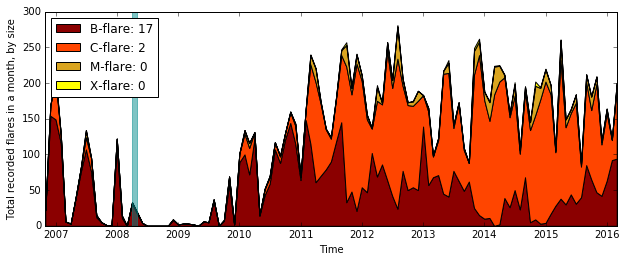

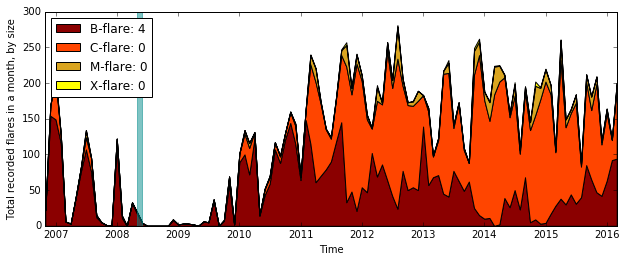

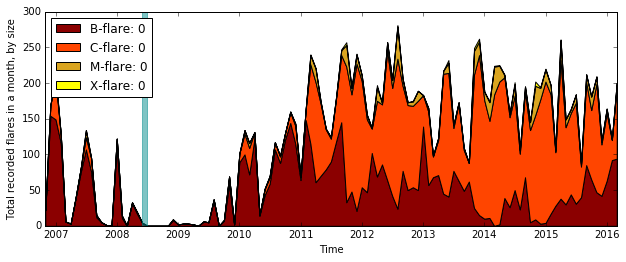

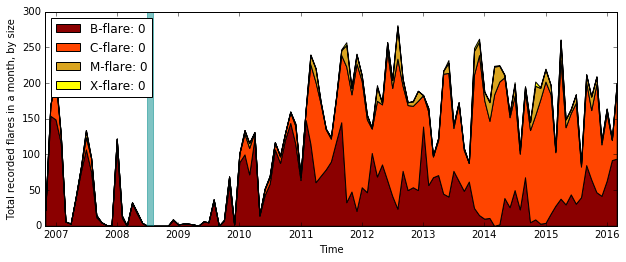

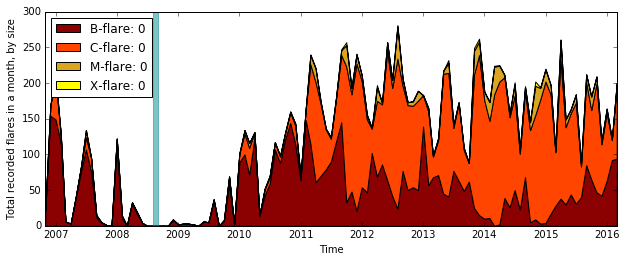

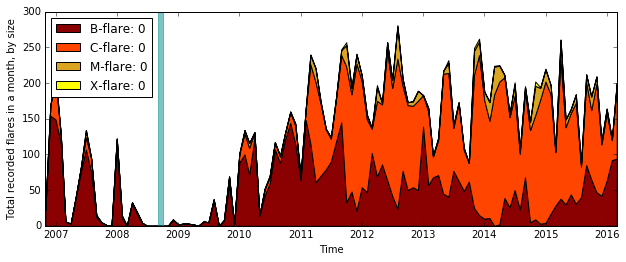

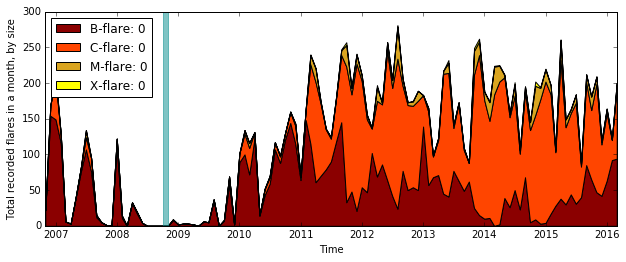

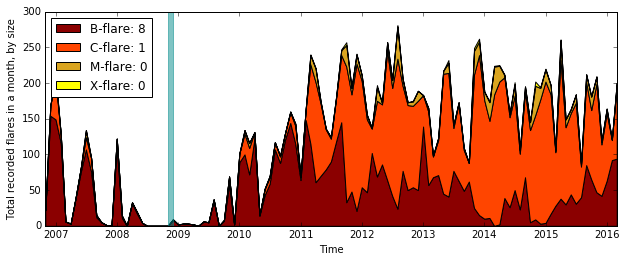

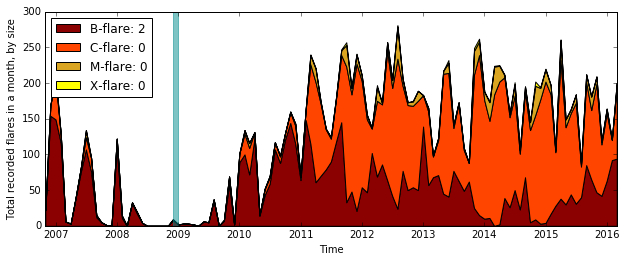

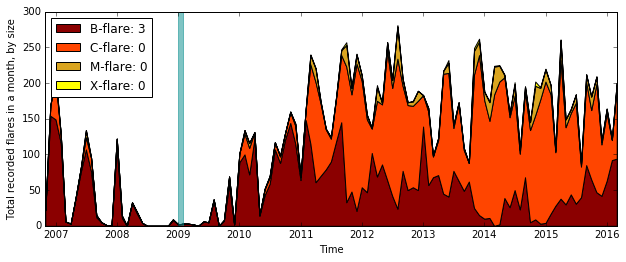

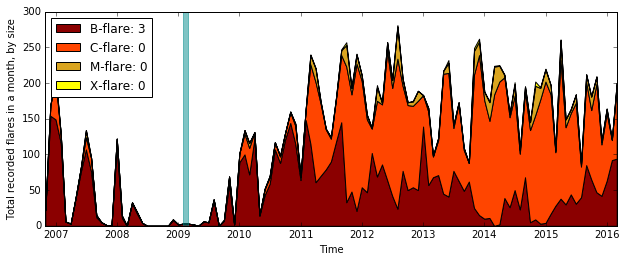

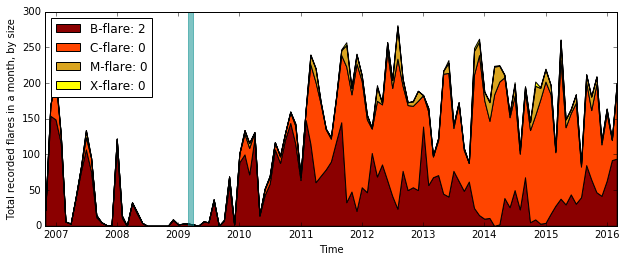

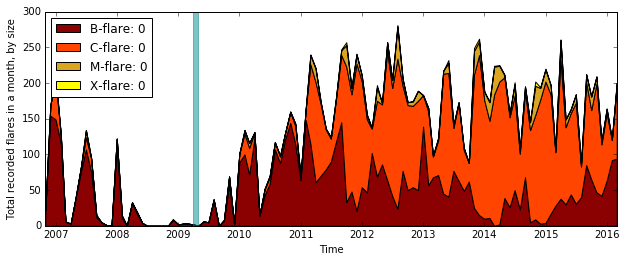

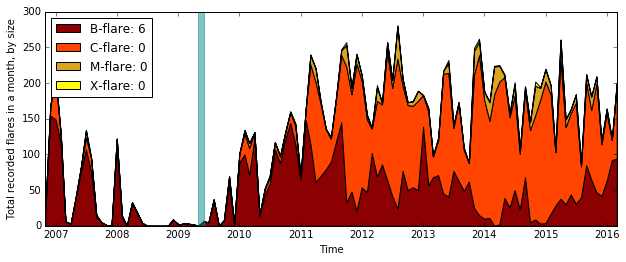

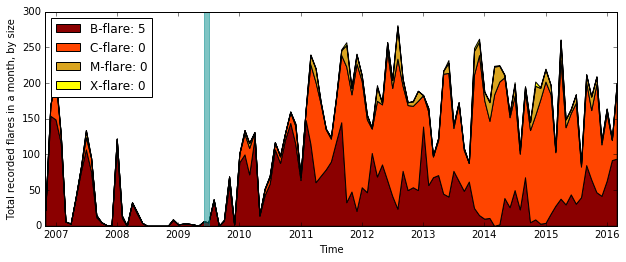

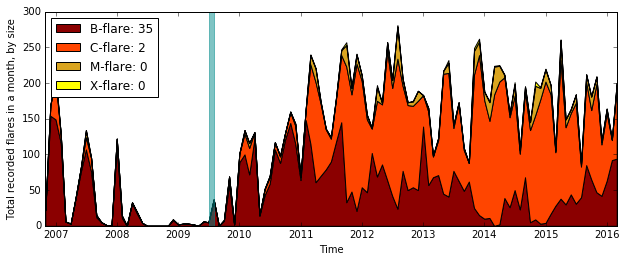

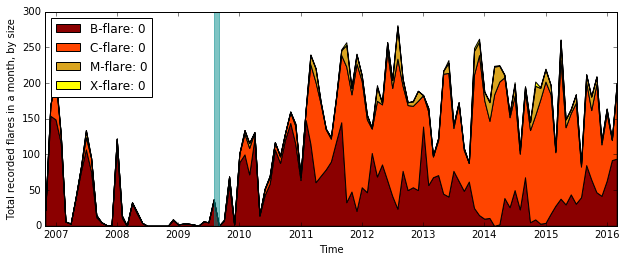

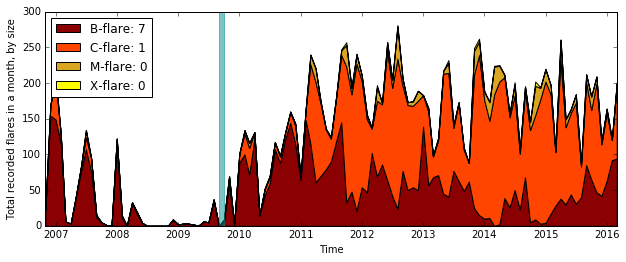

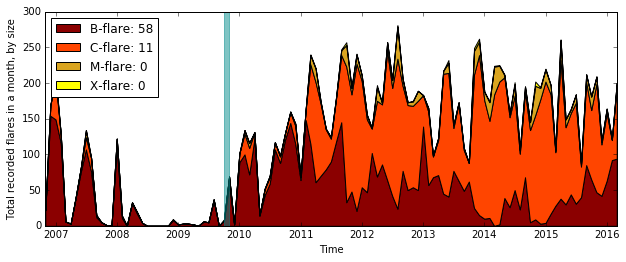

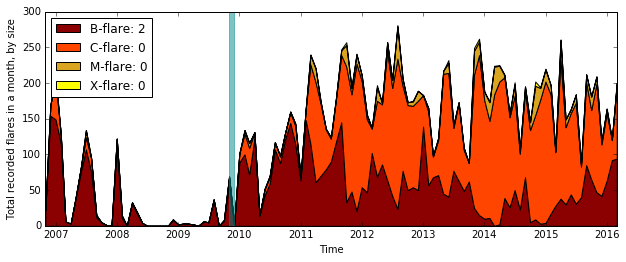

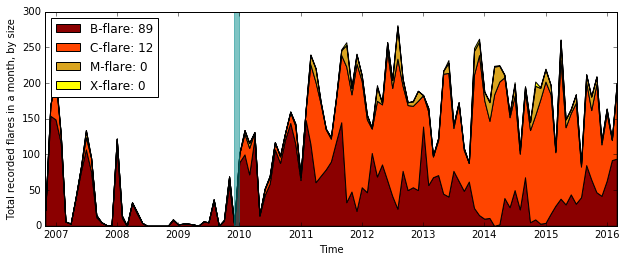

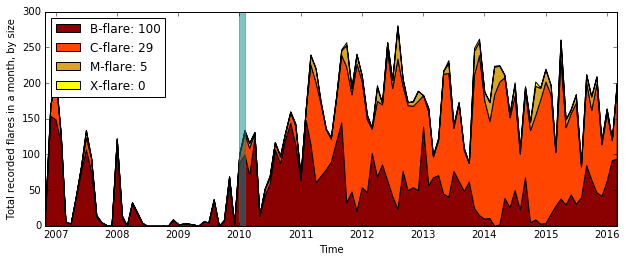

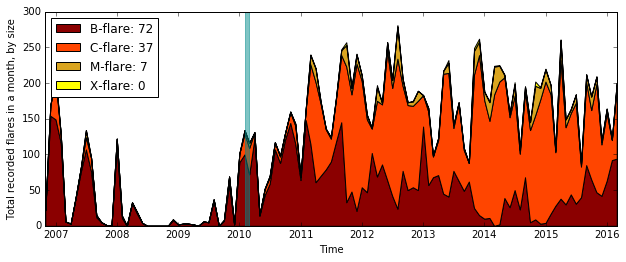

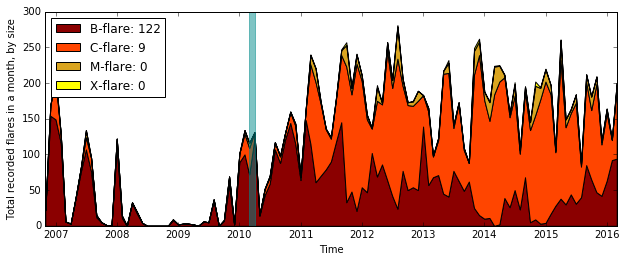

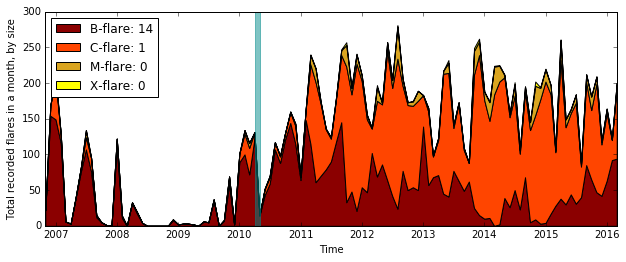

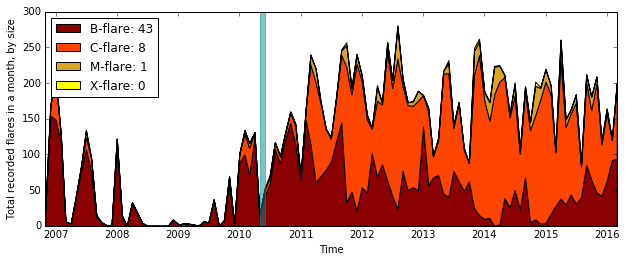

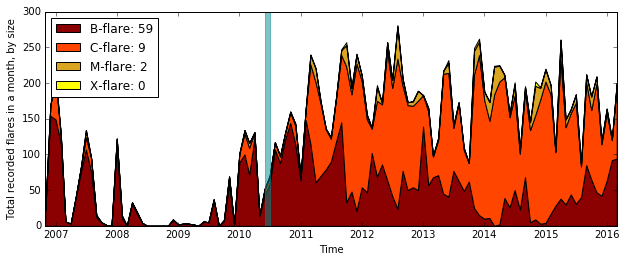

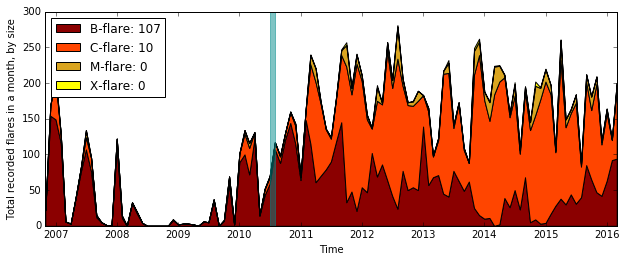

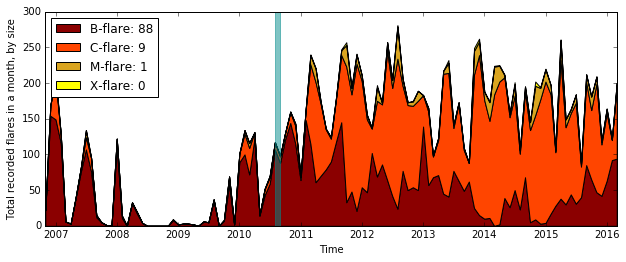

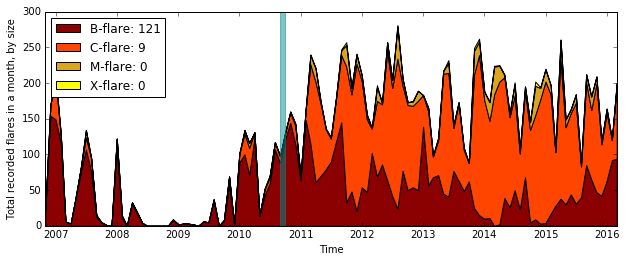

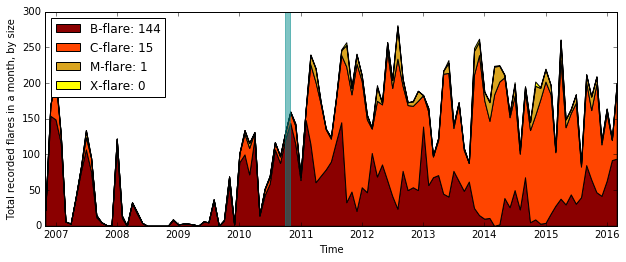

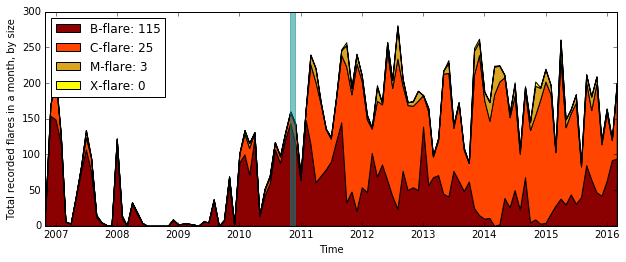

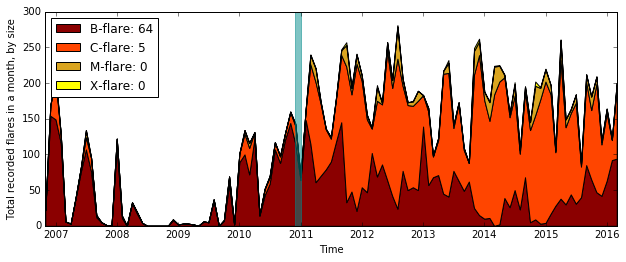

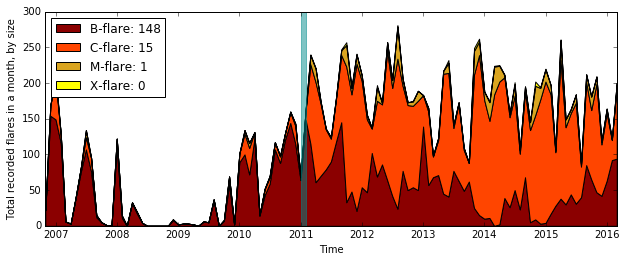

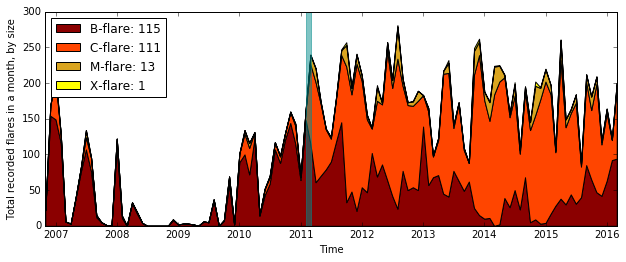

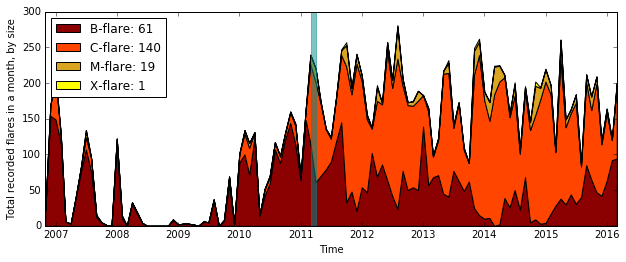

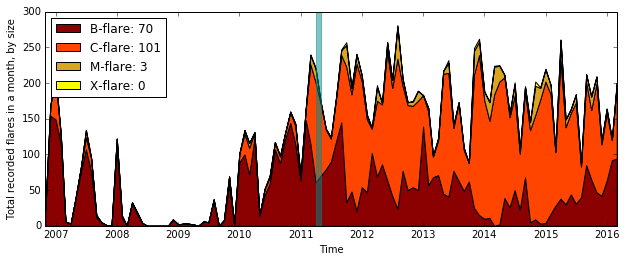

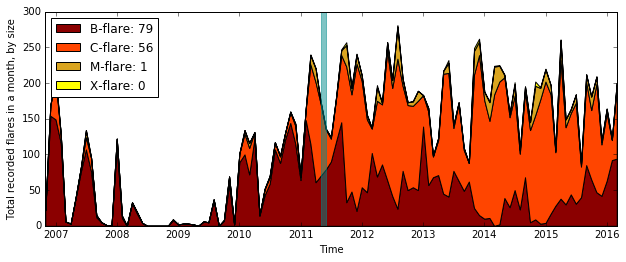

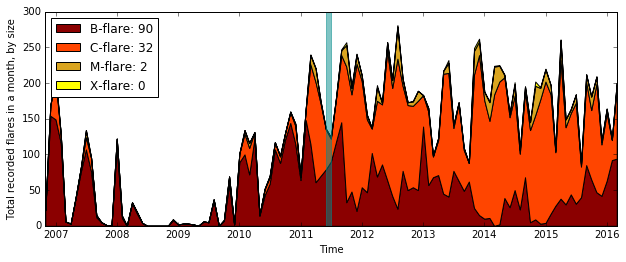

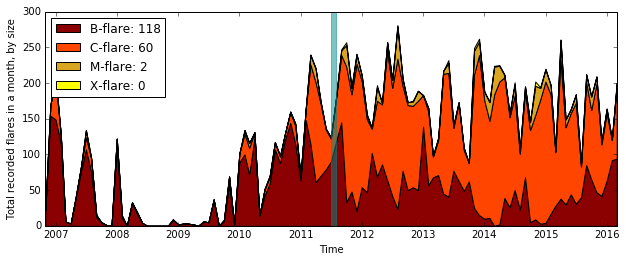

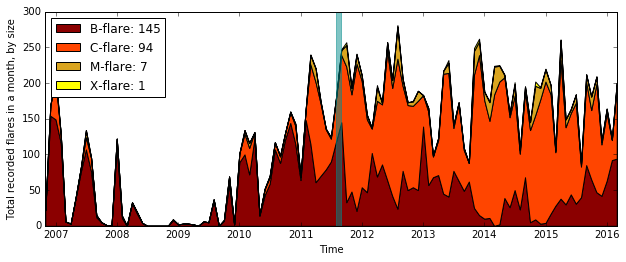

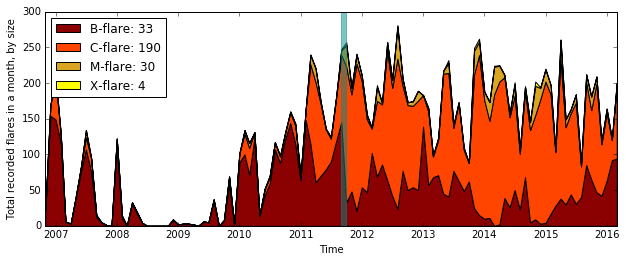

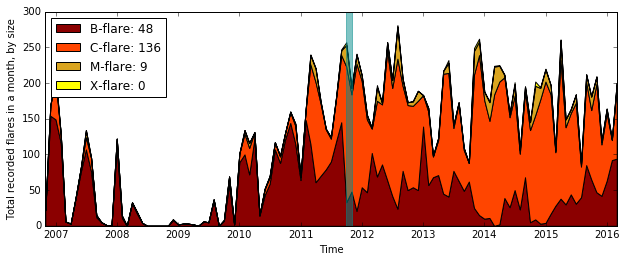

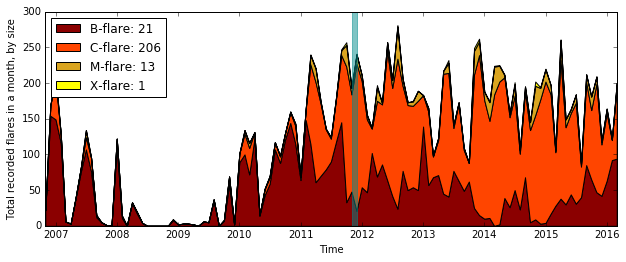

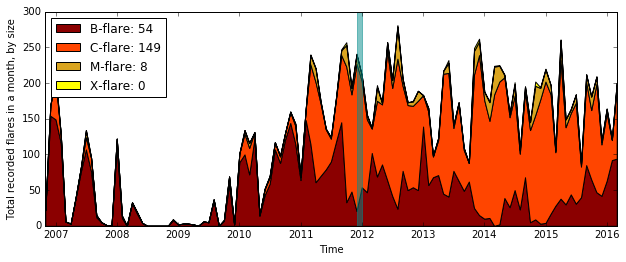

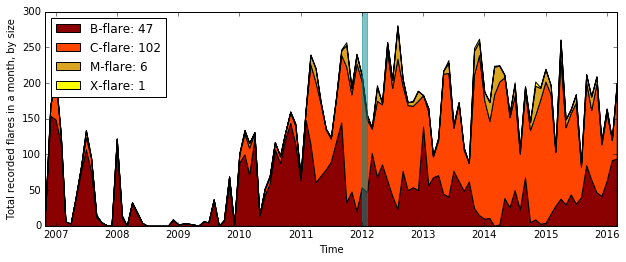

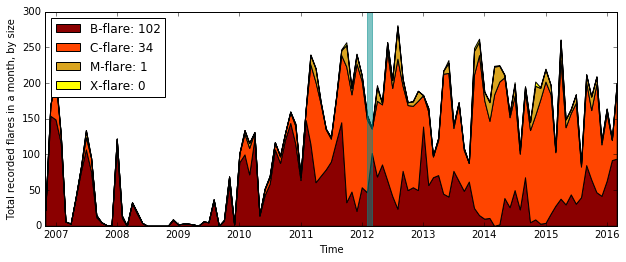

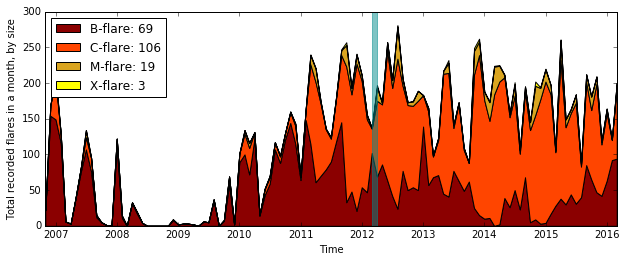

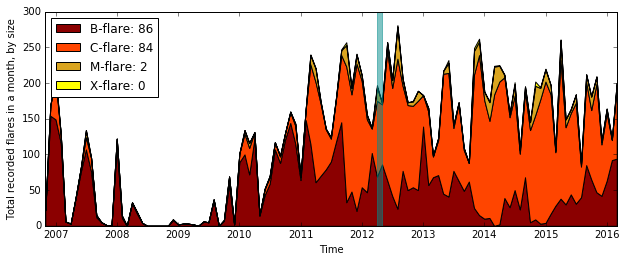

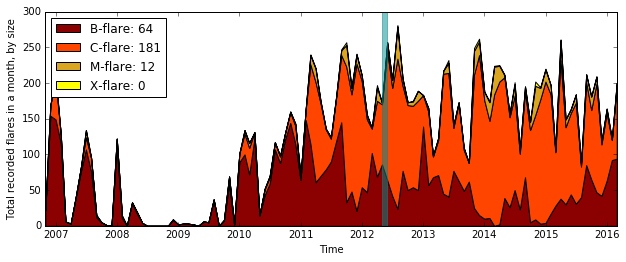

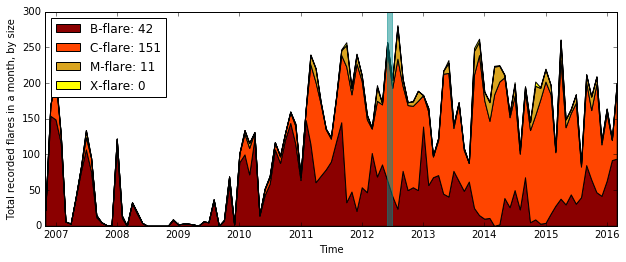

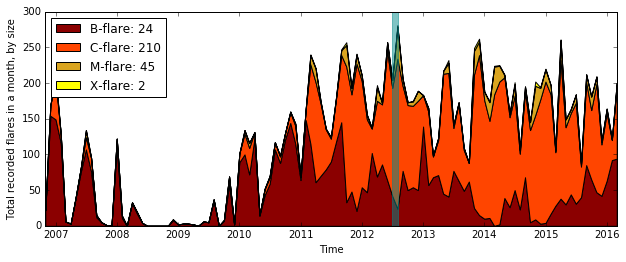

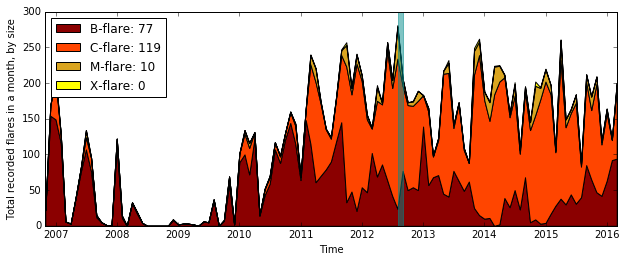

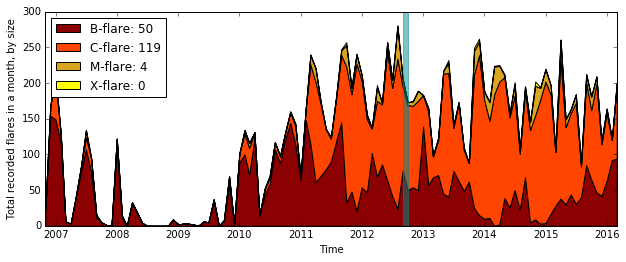

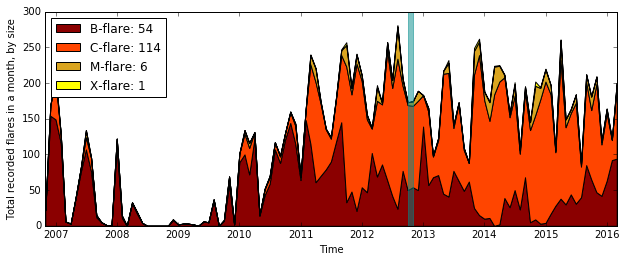

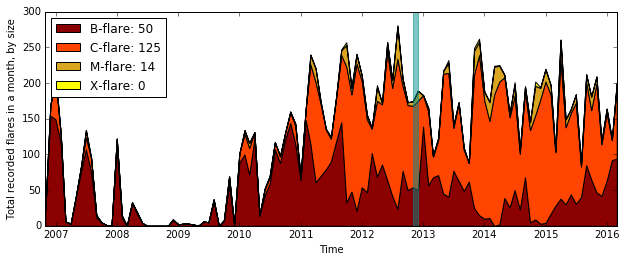

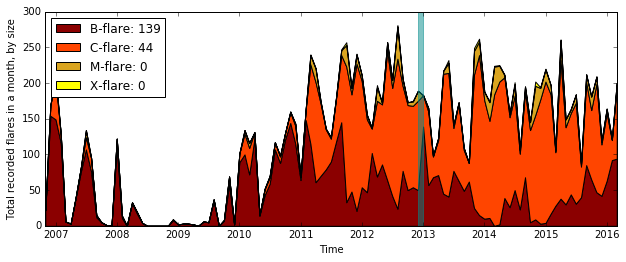

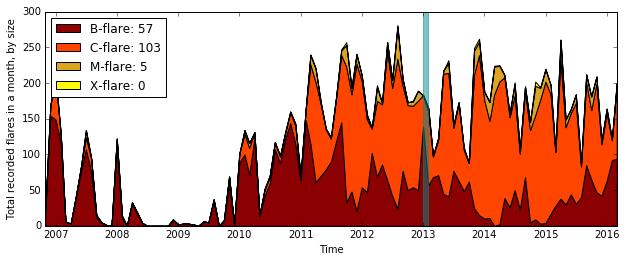

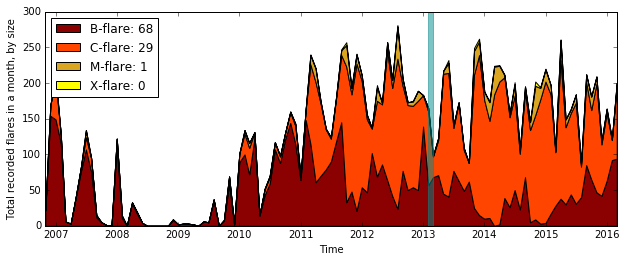

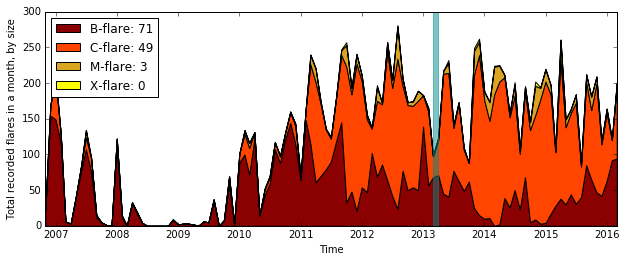

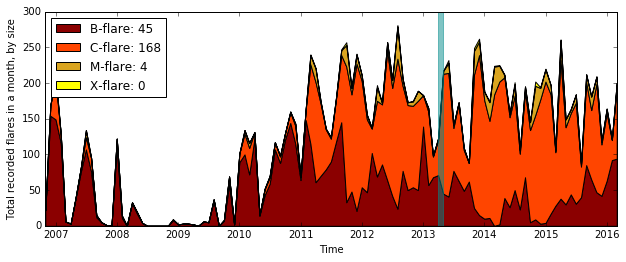

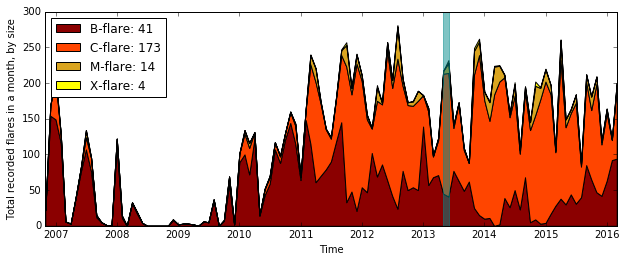

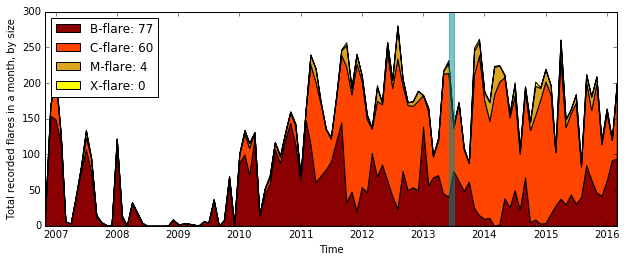

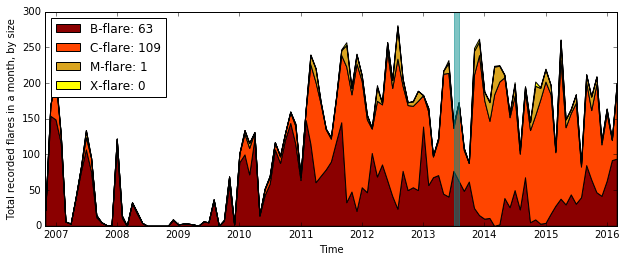

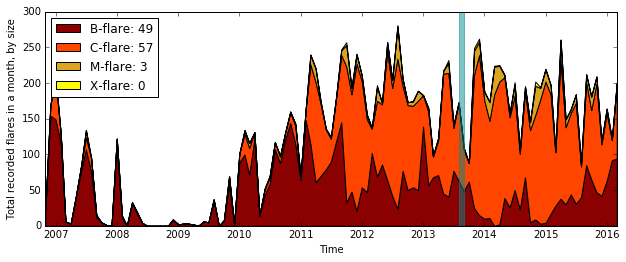

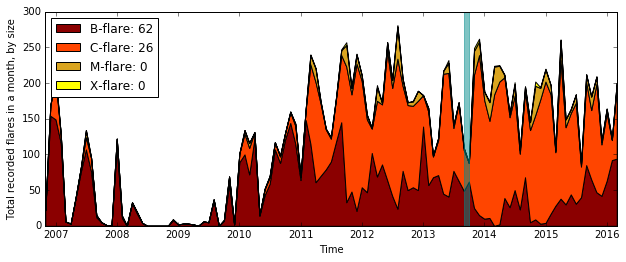

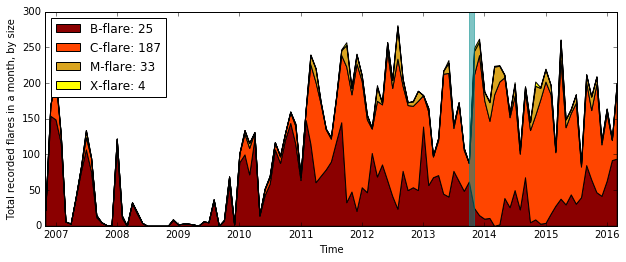

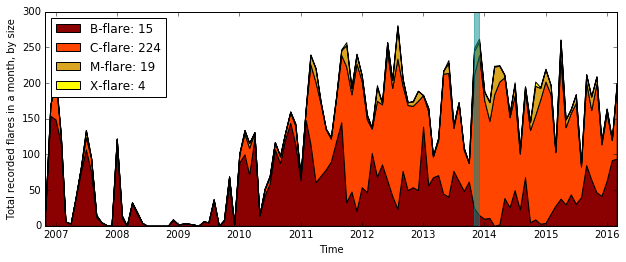

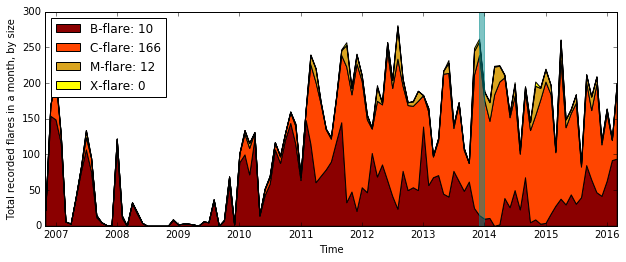

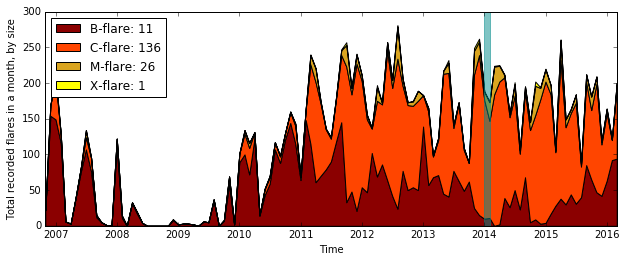

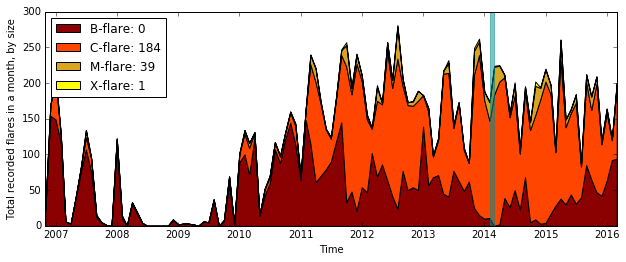

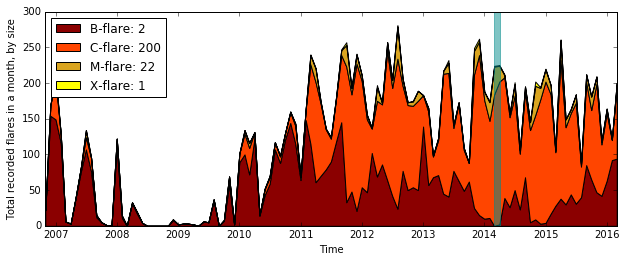

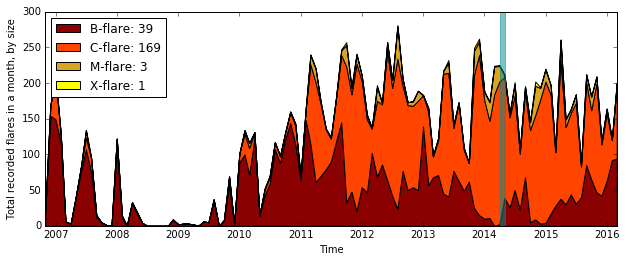

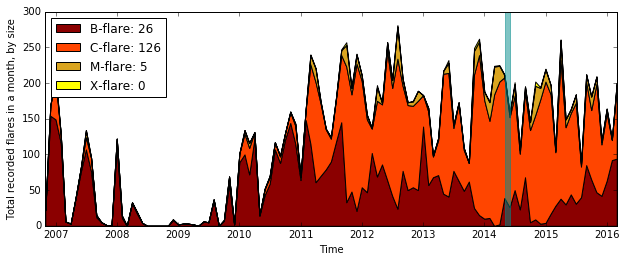

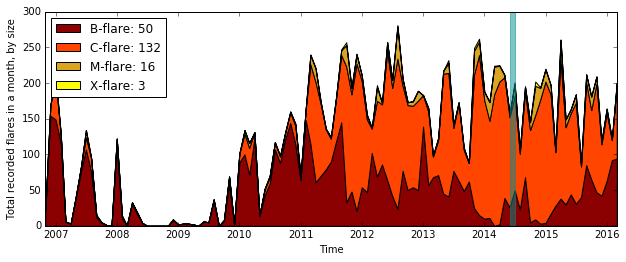

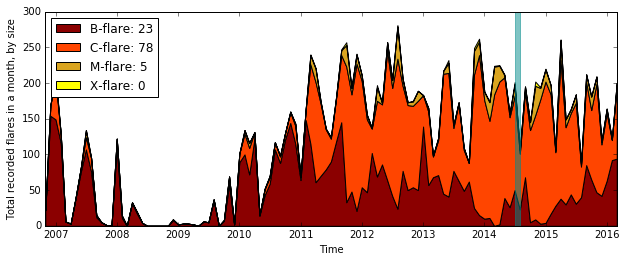

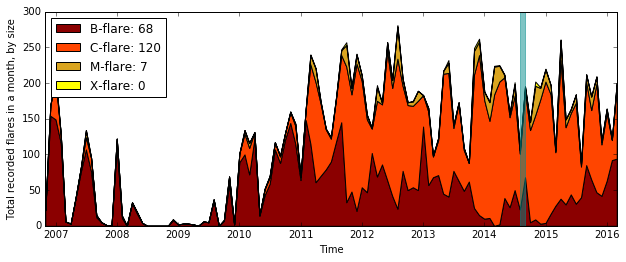

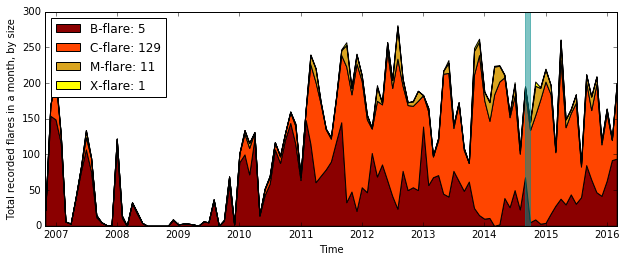

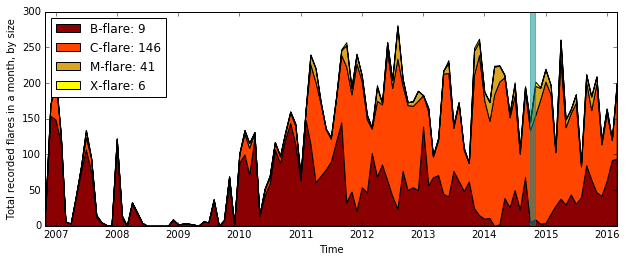

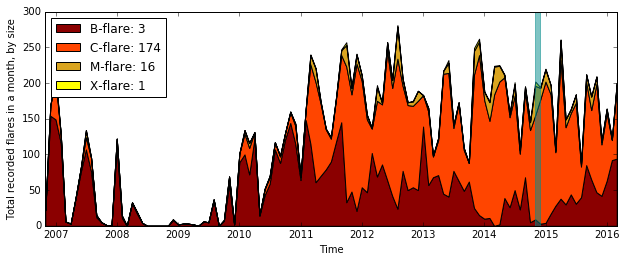

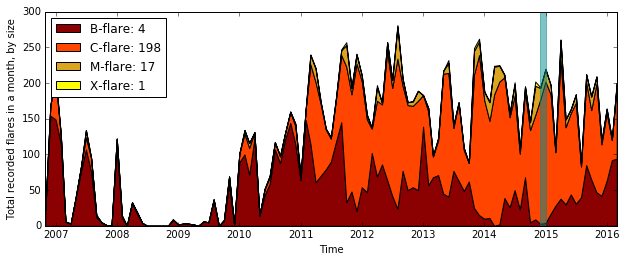

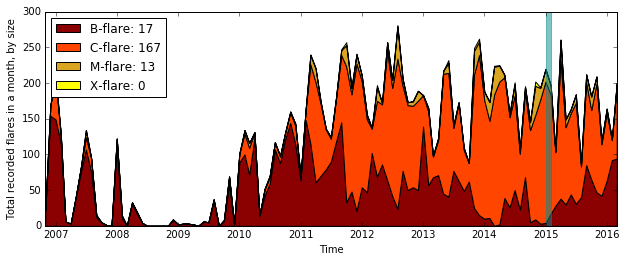

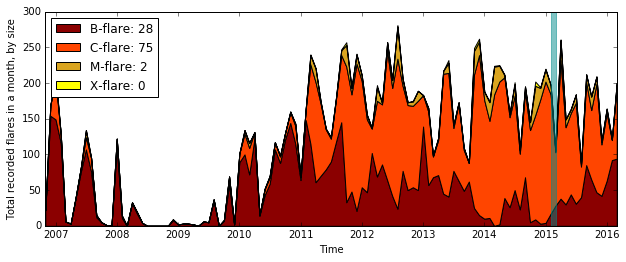

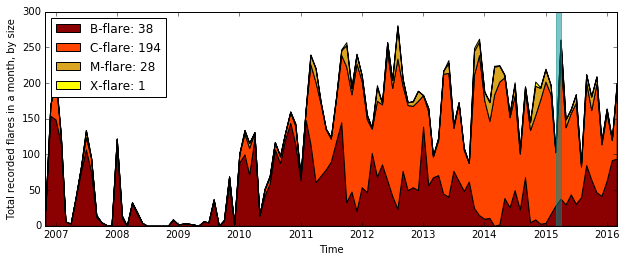

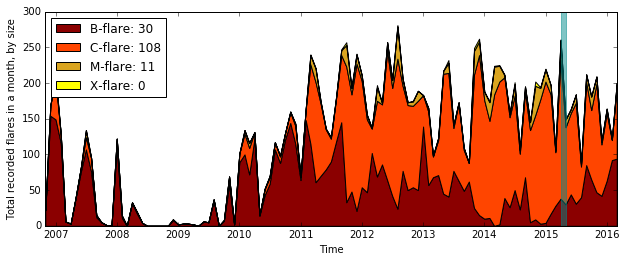

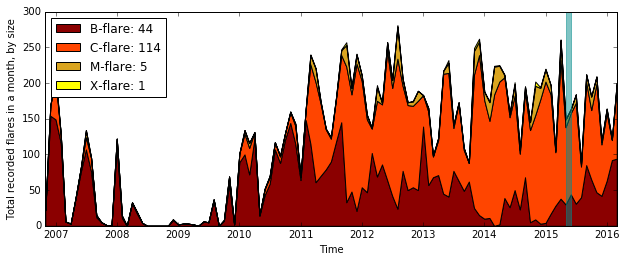

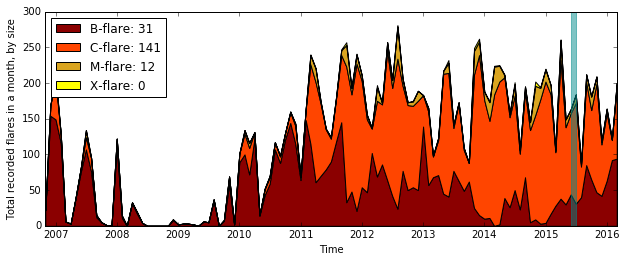

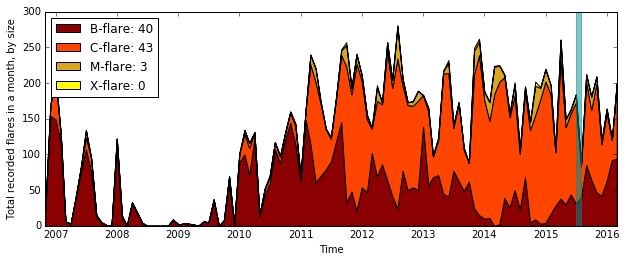

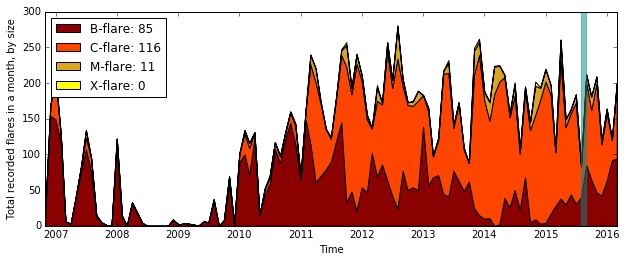

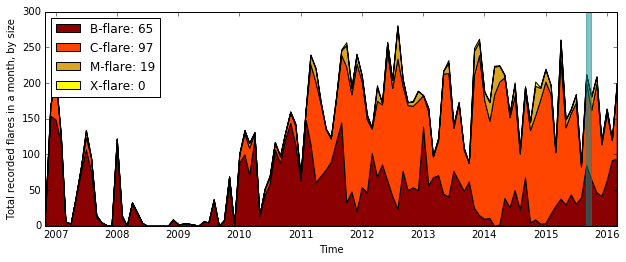

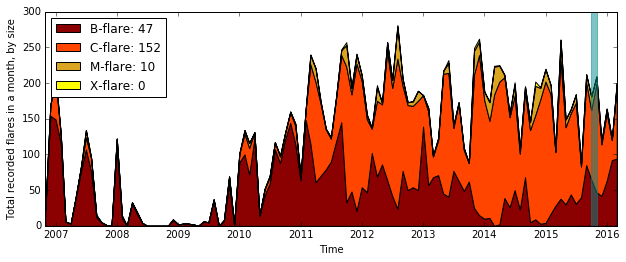

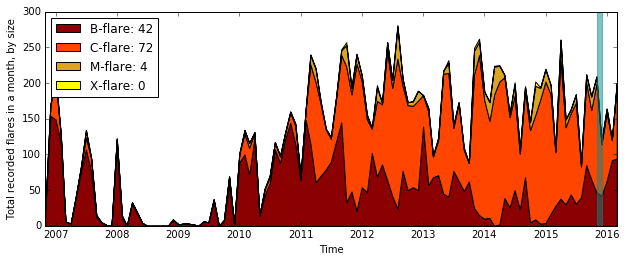

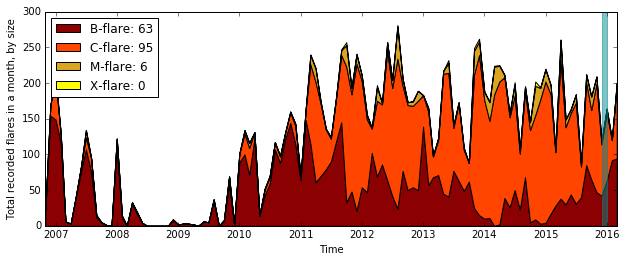

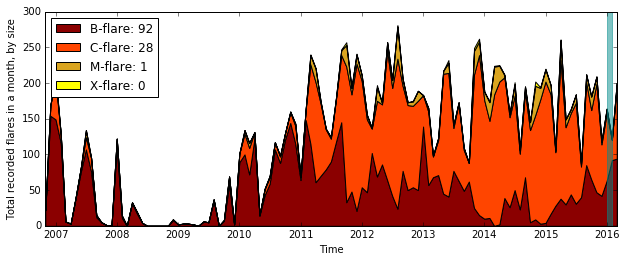

In [13]:
#month2 = range(0,len(month))
#loop through every month and make a plot with a blue bar indicating the month of interest. 
#These plots were strung together to make the movie for the XPOW on April 5, 2016. 

for i in range(len(month)-1):
    make_stackplot(i, i+1)
